In [37]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score            
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.datasets import make_classification


In [51]:
#load data: 
data=pd.read_csv('telco_customer_churn_cleaned.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   MultipleLines                            7043 non-null   int64  
 8   InternetService                          7043 non-null   int64  
 9   OnlineSecurity                           7043 non-null   int64  
 10  OnlineBackup                             7043 no

In [30]:
#extract the target variable and features
y = data['Churn']
X = data[["gender","SeniorCitizen","Partner", "Dependents","tenure", "PhoneService","MultipleLines","InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies","PaperlessBilling","PaymentMethod","Contract","TotalCharges"]]


In [48]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Contract,TotalCharges
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,-0.992611
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,0,0,1,-0.172165
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,1,0,0,-0.958066
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,0,2,1,-0.193672
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,1,1,0,-0.938874


In [49]:
#Scale TotalCharges
scaler = StandardScaler()
X['TotalCharges'] = scaler.fit_transform(X[['TotalCharges']])
X.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Contract,TotalCharges
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,-0.992611
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,0,0,1,-0.172165
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,1,0,0,-0.958066
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,0,2,1,-0.193672
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,1,1,0,-0.938874


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:31:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7793
F1 Score: 0.5447
Precision: 0.6000
Recall: 0.4987
ROC AUC: 0.6895


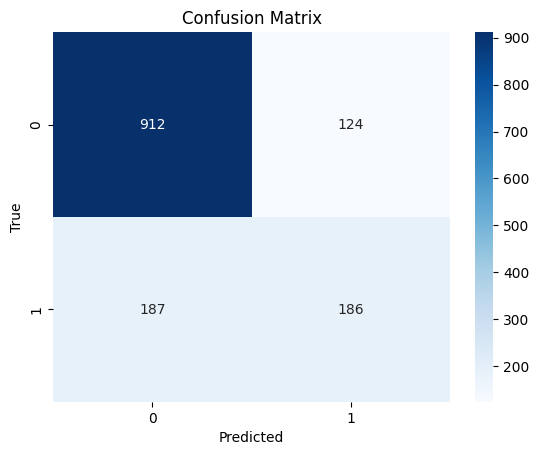

In [50]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()







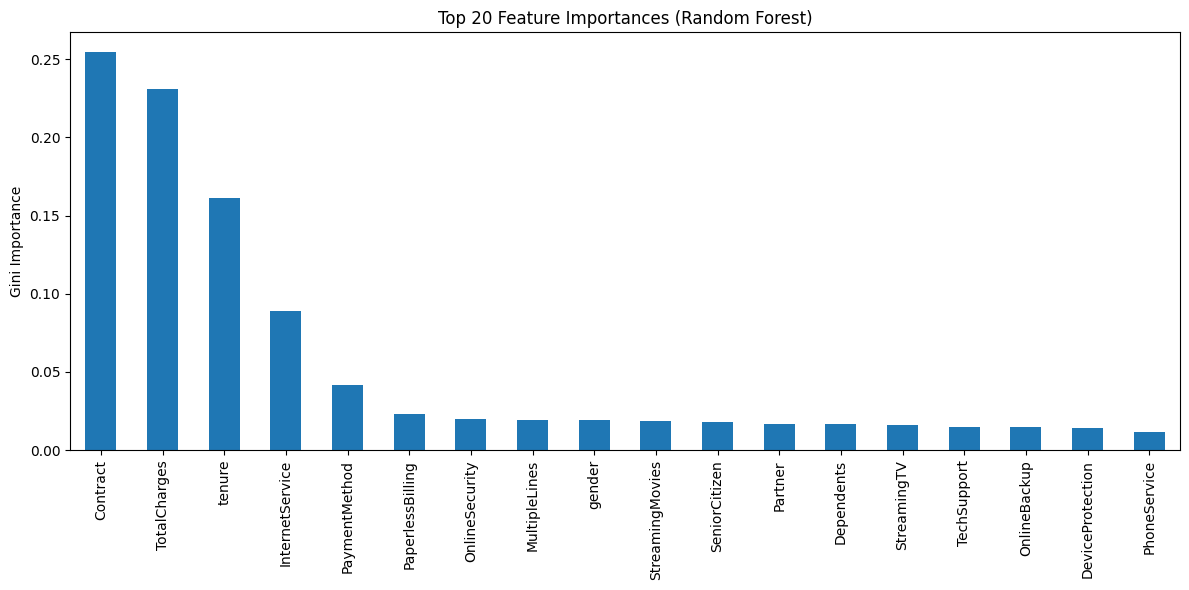

Top 20 most important features:
Contract            0.254481
TotalCharges        0.231084
tenure              0.161236
InternetService     0.089005
PaymentMethod       0.041614
PaperlessBilling    0.022923
OnlineSecurity      0.019627
MultipleLines       0.019271
gender              0.019216
StreamingMovies     0.018713
SeniorCitizen       0.017959
Partner             0.017034
Dependents          0.016647
StreamingTV         0.015917
TechSupport         0.014915
OnlineBackup        0.014715
DeviceProtection    0.013968
PhoneService        0.011675
dtype: float64


In [34]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

forest = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
forest.fit(X_train_df, y_train)

# Use the DataFrame columns to set the index for the feature importances
importances = pd.Series(forest.feature_importances_, index=X_train_df.columns)
top_20 = importances.sort_values(ascending=False).head(20)
top_20.plot(kind='bar', figsize=(12,6), rot=90)
plt.title("Top 20 Feature Importances (Random Forest)")
plt.ylabel("Gini Importance")
plt.tight_layout()
plt.show()

print("Top 20 most important features:")
print(top_20)

In [35]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest F1 Score: {f1_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest ROC AUC: {roc_auc_rf:.4f}")



Random Forest Accuracy: 0.7878
Random Forest F1 Score: 0.5321
Random Forest Precision: 0.6391
Random Forest Recall: 0.4558
Random Forest ROC AUC: 0.6815


Feature ranking:
1. Feature 17 (0.25148885062803256)
2. Feature 4 (0.20448051928414235)
3. Feature 7 (0.07713503717039677)
4. Feature 16 (0.07497661186432975)
5. Feature 15 (0.06301343989007258)
6. Feature 0 (0.033023744110551485)
7. Feature 14 (0.030506850388843813)
8. Feature 2 (0.02817343540895007)
9. Feature 8 (0.027321341113543843)
10. Feature 9 (0.026268247204366612)
11. Feature 13 (0.025957594854224206)
12. Feature 6 (0.025271498676275914)
13. Feature 11 (0.024997972200667583)
14. Feature 1 (0.024502567825474643)
15. Feature 10 (0.024214150507575194)
16. Feature 12 (0.024089936814251697)
17. Feature 3 (0.02360509944823646)
18. Feature 5 (0.010973102610064537)


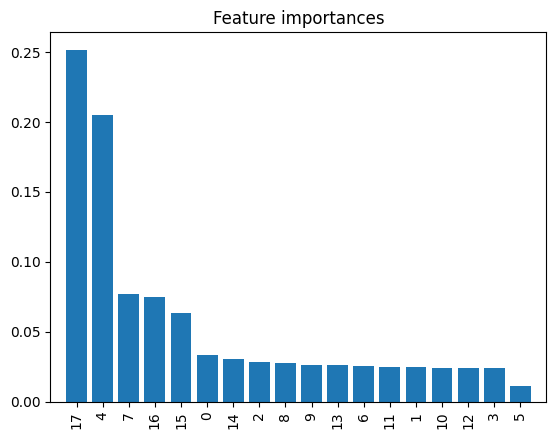

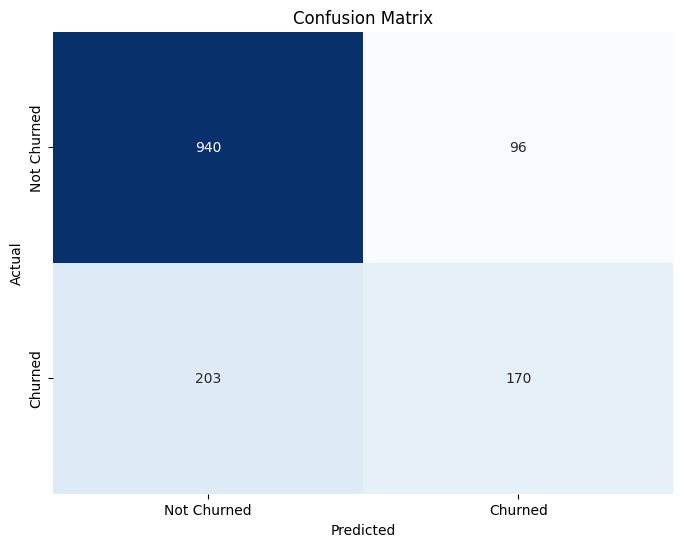

In [36]:
#Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), indices, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()